[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1OS1FX87miHYLQnIdtDpTs73e77axCoKY#scrollTo=eJYnDaqDL8ma)

## Setup

In [ ]:
# !wget -q https://raw.githubusercontent.com/tsunrise/colab-github/main/colab_github.py
# import colab_github
# colab_github.github_auth(persistent_key=True)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# # clone repo
# !git clone git@github.com:Nkosana-263/AI-Mavericks-Traffic-Optimisation.git

Cloning into 'AI-Mavericks-Traffic-Optimisation'...

remote: Enumerating objects: 41, done.

remote: Counting objects: 100% (41/41), done.

remote: Compressing objects: 100% (30/30), done.

remote: Total 41 (delta 10), reused 30 (delta 3), pack-reused 0 (from 0)

Receiving objects: 100% (41/41), 8.06 KiB | 8.06 MiB/s, done.

Resolving deltas: 100% (10/10), done.

Filtering content: 100% (2/2), 245.37 MiB | 37.81 MiB/s, done.


In [ ]:
# %cd /content/AI-Mavericks-Traffic-Optimisation

/content/AI-Mavericks-Traffic-Optimisation


In [ ]:
# # Install required packages
# !pip install pytorch-lightning

In [ ]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [ ]:
cctv_data = pd.read_csv("/kaggle/input/itu-wtsa/intersection_queue.csv", low_memory=False)
weather_data = pd.read_csv("/kaggle/input/itu-wtsa/weather.csv")

In [ ]:
cctv_data["DateTime"] = pd.to_datetime(cctv_data["DateTime"])

In [ ]:
cctv_data['DateTime_hour'] = cctv_data['DateTime'].dt.round('H')
# Merge cctv_data and weather_data on the hourly DateTime column
weather_data["date"] = pd.to_datetime(weather_data["date"]).dt.round('H').dt.tz_localize(None)
merged_df = pd.merge(cctv_data, weather_data, left_on='DateTime_hour', right_on='date', how='left')


/tmp/ipykernel_31/276410525.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  cctv_data['DateTime_hour'] = cctv_data['DateTime'].dt.round('H')
/tmp/ipykernel_31/276410525.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_data["date"] = pd.to_datetime(weather_data["date"]).dt.round('H').dt.tz_localize(None)


In [ ]:
merged_df

,Unnamed: 0_x,DateTime,Queue Length_link1,Queue Length_link3,Queue Length_link5,Queue Length_link6,DateTime_hour,Unnamed: 0_y,date,temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,wind_gusts_10m,cloudcover
0,0,2018-01-01 00:00:00,11,4,4,2,2018-01-01,24,2018-01-01,20.369501,88.02467,0.0,5.351785,9.360000,11.099999
1,1,2018-01-01 00:00:05,6,5,2,1,2018-01-01,24,2018-01-01,20.369501,88.02467,0.0,5.351785,9.360000,11.099999
2,2,2018-01-01 00:00:10,4,3,3,4,2018-01-01,24,2018-01-01,20.369501,88.02467,0.0,5.351785,9.360000,11.099999
3,3,2018-01-01 00:00:15,4,1,1,1,2018-01-01,24,2018-01-01,20.369501,88.02467,0.0,5.351785,9.360000,11.099999
4,4,2018-01-01 00:00:20,5,3,6,0,2018-01-01,24,2018-01-01,20.369501,88.02467,0.0,5.351785,9.360000,11.099999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003133,7003133,2019-02-22 23:59:40,7,1,6,2,2019-02-23,552,2019-02-23,26.369501,93.13334,0.0,8.707238,11.879999,22.800000
7003134,7003134,2019-02-22 23:59:45,4,0,2,3,2019-02-23,552,2019-02-23,26.369501,93.13334,0.0,8.707238,11.879999,22.800000
7003135,7003135,2019-02-22 23:59:50,4,2,2,3,2019-02-23,552,2019-02-23,26.369501,93.13334,0.0,8.707238,11.879999,22.800000
7003136,7003136,2019-02-22 23:59:55,7,1,4,3,2019-02-23,552,2019-02-23,26.369501,93.13334,0.0,8.707238,11.879999,22.800000


In [ ]:
merged_df = merged_df.drop(columns=["Unnamed: 0_x", "DateTime_hour", "Unnamed: 0_y", "date"])

## Define Model

In [ ]:
!pip install pytorch-forecasting
!pip install pytorch_optimizer
!pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 7.2 MB/s eta 0:00:00


In [ ]:
import copy
from pathlib import Path
import warnings

import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger
import numpy as np
import pandas as pd
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer, MultiNormalizer, EncoderNormalizer, TorchNormalizer
from pytorch_forecasting.metrics import MAE, SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

## Dataloaders

In [ ]:
start_date, end_date = "2018-01-01", "2019-01-01"
merged_df = merged_df[(merged_df['DateTime'] >= start_date) & (merged_df['DateTime'] <= end_date)]

In [ ]:
len(merged_df)

6087299

In [ ]:
# add time index
merged_df["time_idx"] = ((merged_df['DateTime'] - merged_df['DateTime'].min()).dt.total_seconds() // 5).astype(int)


In [ ]:
merged_df.columns

Index(['DateTime', 'Queue Length_link1', 'Queue Length_link3',
       'Queue Length_link5', 'Queue Length_link6', 'temperature_2m',
       'relative_humidity_2m', 'precipitation', 'wind_speed_10m',
       'wind_gusts_10m', 'cloudcover', 'time_idx'],
      dtype='object')

In [ ]:
# data = merged_df.melt(id_vars=['time_idx', 'temperature_2m', 'relative_humidity_2m',
#                         'precipitation', 'wind_speed_10m', 'wind_gusts_10m', 'cloudcover'],
#                      value_vars=['Queue Length_link1', 'Queue Length_link3', 'Queue Length_link5', 'Queue Length_link6'],
#                      var_name='link',
#                      value_name='queue_length')

In [ ]:
# # Create a group column
# data['link'] = data['link'].str.replace('Queue Length_', '')  # Remove prefix
# # data.rename(columns={'link': 'group'}, inplace=True)

In [ ]:
merged_df["intersection"] ="sathorn"

In [ ]:
max_prediction_length = 2 * 60 * 12 # 2 hour forecast
max_encoder_length = 8 * 60 * 12 # 8 hours
training_cutoff = merged_df["time_idx"].max() - max_prediction_length

training = TimeSeriesDataSet(
    merged_df[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    group_ids=["intersection"],
    target=["Queue Length_link1", "Queue Length_link3", "Queue Length_link5", "Queue Length_link6"],
    min_encoder_length=max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    # static_categoricals=["group"],
    time_varying_known_reals=["time_idx", "temperature_2m", "relative_humidity_2m",
                              "wind_speed_10m", "wind_gusts_10m"],
    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=[
        "Queue Length_link1", "Queue Length_link3", "Queue Length_link5",
        "Queue Length_link6", "cloudcover", "precipitation",
    ],
    # target_normalizer=GroupNormalizer(
    #     groups=["link"], transformation="softplus"
    # ),
    # target_normalizer=MultiNormalizer([
    #     EncoderNormalizer(),
    #     TorchNormalizer()]
    #   ),
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True
)

/opt/conda/lib/python3.10/site-packages/pytorch_forecasting/data/timeseries.py:572: UserWarning: Target scales will be only added for continous targets
  warnings.warn("Target scales will be only added for continous targets", UserWarning)


In [ ]:
# Create validation set, horizon = 2 hours
validation = TimeSeriesDataSet.from_dataset(training, merged_df, predict=True, stop_randomization=True)

# Create dataloaders
batch_size = 32
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=4)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=4)

## Train Model

In [ ]:
# configure network and trainer
pl.seed_everything(42)
trainer = pl.Trainer(
    accelerator="gpu",
    gradient_clip_val=0.1,
#     gpus=2,
)


tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=8,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    loss=QuantileLoss(),
    optimizer="ranger"
    # reduce_on_plateau_patience=1000,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

INFO: Seed set to 42
INFO: Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs


Number of parameters in network: 11.7k


/opt/conda/lib/python3.10/site-packages/lightning/pytorch/loops/utilities.py:72: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_steps=100` reached.
INFO: Learning rate set to 0.17782794100389226
INFO: Restoring states from the checkpoint path at /kaggle/working/.lr_find_df65c929-e812-48ec-b494-5162df77e501.ckpt
INFO: Restored all states from the checkpoint at /kaggle/working/.lr_find_df65c929-e812-48ec-b494-5162df77e501.ckpt


suggested learning rate: 0.17782794100389226


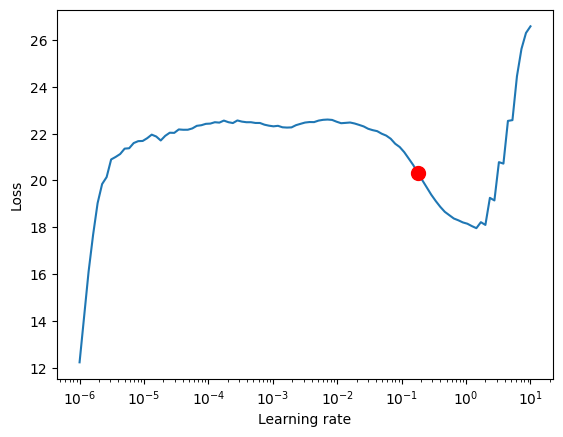

In [ ]:
# find optimal learning rate
from lightning.pytorch.tuner import Tuner

res = Tuner(trainer).lr_find(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
    max_lr=10.0,
    min_lr=1e-6,
)

print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

In [ ]:
# configure network and trainer
early_stop_callback = EarlyStopping(
    monitor="val_loss",
    min_delta=1.8e-2,
    patience=10,
    verbose=False,
    mode="min")
lr_logger = LearningRateMonitor()
logger = TensorBoardLogger("lightning_logs")

trainer = pl.Trainer(
    max_epochs=10,
    accelerator="gpu",
#     gpus=2,
    enable_model_summary=True,
    gradient_clip_val=0.1,
    limit_train_batches=50,
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)

tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=res.suggestion(),
    hidden_size=16,
    attention_head_size=2,
    dropout=0.1,
    hidden_continuous_size=8,
    loss=QuantileLoss(),
    optimizer="ranger",
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

INFO: Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs


Number of parameters in network: 26.7k


In [ ]:
# Fit network
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | MultiLoss                       | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 0      | train
3  | prescalers                         | ModuleDict                      | 208    | train
4  | static_variable_selection          | VariableSelectionNetwork        | 528    | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 8.2 K  | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 3.7 K  | train
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K  | train
8  | static_context_initial

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
# import pickle

# from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

# # create study
# study = optimize_hyperparameters(
#     train_dataloader,
#     val_dataloader,
#     model_path="optuna_test",
#     n_trials=200,
#     max_epochs=50,
#     gradient_clip_val_range=(0.01, 1.0),
#     hidden_size_range=(8, 128),
#     hidden_continuous_size_range=(8, 128),
#     attention_head_size_range=(1, 4),
#     learning_rate_range=(0.001, 0.1),
#     dropout_range=(0.1, 0.3),
#     trainer_kwargs=dict(limit_train_batches=30),
#     reduce_on_plateau_patience=4,
#     use_learning_rate_finder=False,  # use Optuna to find ideal learning rate or use in-built learning rate finder
# )

# # save study results - also we can resume tuning at a later point in time
# with open("test_study.pkl", "wb") as fout:
#     pickle.dump(study, fout)

# # show best hyperparameters
# print(study.best_trial.params)

## Model Evaluation

In [ ]:
# Load best model
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

In [ ]:
predictions = best_tft.predict(val_dataloader, return_y=True, trainer_kwargs=dict(accelerator="gpu"))

# Extract outputs and targets
outputs = predictions.output
targets = predictions.y

mae_values = []

# Iterate through each target
for i in range(len(outputs)):
    predicted_values = outputs[i]
    actual_values = targets[0][i]

    # Calculate Mean Absolute Error (MAE)
    mae_value = MAE()(predicted_values, actual_values)
    mae_values.append(mae_value.item())

average_mae = sum(mae_values) / len(mae_values)

print(f'MAE for each target: {mae_values}')
print(f'Average Val MAE: {average_mae}')

INFO: Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


MAE for each target: [2.6951446533203125, 1.237926721572876, 2.279632329940796, 3.90393328666687]
Average Val MAE: 2.5291592478752136


In [ ]:
# raw_predictions = best_tft.predict(val_dataloader, mode="raw", return_x=True)

# for idx in range(12):  # plot 12 examples (1 min)
#     best_tft.plot_prediction(raw_predictions.x, raw_predictions.output, idx=idx, add_loss_to_title=True)

In [ ]:
# predictions = best_tft.predict(val_dataloader, return_y=True)
# mean_losses = SMAPE(reduction="none")(predictions.output, predictions.y).mean(1)
# indices = mean_losses.argsort(descending=True)
# for idx in range(12):
#     best_tft.plot_prediction(
#         raw_predictions.x,
#         raw_predictions.output,
#         idx=indices[idx],
#         add_loss_to_title=SMAPE(quantiles=best_tft.loss.quantiles),
#     )

In [ ]:
# # Actuals vs predictions by variables
# predictions = best_tft.predict(val_dataloader, return_x=True)
# predictions_vs_actuals = best_tft.calculate_prediction_actual_by_variable(predictions.x, predictions.output)
# best_tft.plot_prediction_actual_by_variable(predictions_vs_actuals)

In [ ]:
# Variable importance plot
interpretation = best_tft.interpret_output(raw_predictions.output, reduction="sum")
best_tft.plot_interpretation(interpretation)

In [ ]:
# Partial dependency plot
dependency = best_tft.predict_dependency(
    val_dataloader.dataset, "temperature_2m", np.linspace(0, 30, 30), show_progress_bar=True, mode="dataframe"
)

agg_dependency = dependency.groupby("temperature_2m").normalized_prediction.agg(
    median="median", q25=lambda x: x.quantile(0.25), q75=lambda x: x.quantile(0.75)
)
ax = agg_dependency.plot(y="median")
ax.fill_between(agg_dependency.index, agg_dependency.q25, agg_dependency.q75, alpha=0.3)